In [1]:
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# trend_DB visualization

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# confirm that our new database was created
print(mongo.list_database_names())

['admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'project3', 'project3trend', 'uk_food']


In [4]:
# Create the database under 'project3trend'
trend_db = mongo['project3trend']

In [5]:
# Print collection names
print(trend_db.list_collection_names())

# Define the collection
trend_collection = trend_db['trend_data']

['trend_data']


In [6]:
# Define the aggregation pipeline
pipeline = [
    {"$group": {"_id": "$Year", "mass_shootings": {"$sum": "$Mass Shootings (Incidents)"}}},
    {"$sort": {"_id": 1}}]

In [7]:
# Execute the aggregation pipeline and convert the result to a DataFrame
result = trend_collection.aggregate(pipeline)
trend_df = pd.DataFrame(list(result))
trend_df.head()

,_id,mass_shootings
0,1966,2.0
1,1967,1.0
2,1968,1.0
3,1969,1.0
4,1970,1.0


In [8]:
# Convert Year column to string type
trend_df["_id"] = trend_df["_id"].astype(str)

# remove rows containing 'Mean', 'Total', and 'Yearly Growth Rate' from 'Year' column
trend_df = trend_df[~trend_df['_id'].str.contains('Mean|Total|Yearly Growth Rate')]

# Find the index of the row containing '2022' in the '_id' column
idx = trend_df.loc[trend_df['_id'] == '2022'].index[0]

# Slice the dataframe up to and including the row containing '2022'
trend_df = trend_df.iloc[:idx+1]

Text(0.5, 1.0, 'Mass Shootings Trend in the US (1966-2022)')

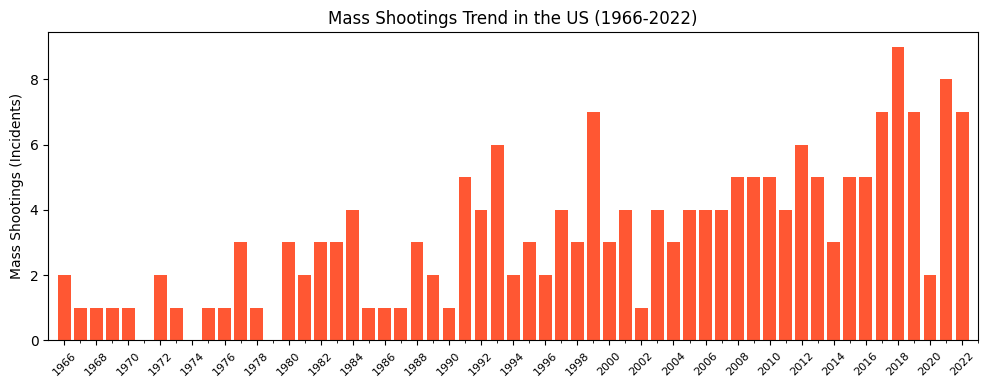

In [9]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12,4))

# Create a bar chart using pyplot.bar()
ax.bar(trend_df["_id"], trend_df["mass_shootings"], color='#FF5733')

# Set the x-limits to exclude empty spaces
ax.set_xlim(left=-1, right=len(trend_df["_id"])+0)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set the x-tick frequency to only show even years
ax.set_xticks(trend_df.index[trend_df["_id"].astype(int) % 2 == 0])
ax.set_xticklabels(trend_df["_id"][trend_df["_id"].astype(int) % 2 == 0], fontsize=8)

# Add minor ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# Add labels and title to the chart
ax.set_ylabel('Mass Shootings (Incidents)')
ax.set_title('Mass Shootings Trend in the US (1966-2022)')

# full_DB visualization

In [10]:
# Create the database under 'project3'
full_db = mongo['project3']

In [13]:
# Print collection names
print(full_db.list_collection_names())

# Define the collection
full_collection = full_db['full_data']

['full_data']
